# Exercicios Resolvidos
## Fundamentos de Macroeconomia e Políticas Públicas

### Exercicio 1

Uma empresa que acabou de ganhar uma concessão para operar uma hidrelétrica em Moçambique, com a perspectiva de obter um fluxo de caixa livre (FCn) em Dólar de $100 MM ao ano nos próximos 30 anos, encomendou-lhe o seguinte estudo:

Continuação:

(d) A Empresa pede também que vc represente os Valores Presentes (VP) dos Fluxos de Caixa (FC) em 3 gráficos de pizza (uma pizza para cada taxa de desconto, sem o IIo)

(e) Ela gostaria de saber ainda qual é o VP do somatório dos 3 primeiros FC como percentagem do Valor Presente total, (não é do VPL, é do VP dos fluxos positivos) e, também, dos 3 últimos FC como porcentagem do VP total, em cada uma das três pizzas (ou seja, quando os fluxos de caixa forem descontados às taxas de 3%, 9% e 15%). (Desconsidere o investimento inicial, some os 3 primeiros fluxos e veja quanto ele representa do VP total. Repita o procedimento para os 3 últimos fluxos).

(f) Ela solicita que vc calcule o Payback Descontado de cada um dos três cenários (o descontado a 3%, o segundo a 9% e o terceiro a 15%).

(g) Ela tbm quer que vc calcule a TIR. Considere que a taxa mínima de atratividade é de 9% e faça sua análise se o projeto deve ser aceito ou rejeitado.

(h) Analise o que ocorre se, após o investimento inicial tiver sido realizado, houver um problema que leve a um atraso de dois anos para o recebimento do primeiro FC. Calcule qual impacto esse atraso terá no VPL, e se ele será relevante. Verifique se esse impacto varia em função da taxa de desconto, e para qual taxa ele é mais significativo.

#### Resolução

In [1]:
#  (b)
import numpy as np
import pandas as pd
from tabulate import tabulate

anos = np.arange(0,31)
fc = np.append([-500.0], np.repeat(100.0, 30))

df = pd.DataFrame({'Anos': anos, 'FCn': fc})

df['Taxa 3%'] = df['FCn'].values / (1+(3/100))**df['Anos'].values
df['Taxa 9%'] = df['FCn'].values / (1+(9/100))**df['Anos'].values
df['Taxa 15%'] = df['FCn'].values / (1+(15/100))**df['Anos'].values

df = df.round(2)

#print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

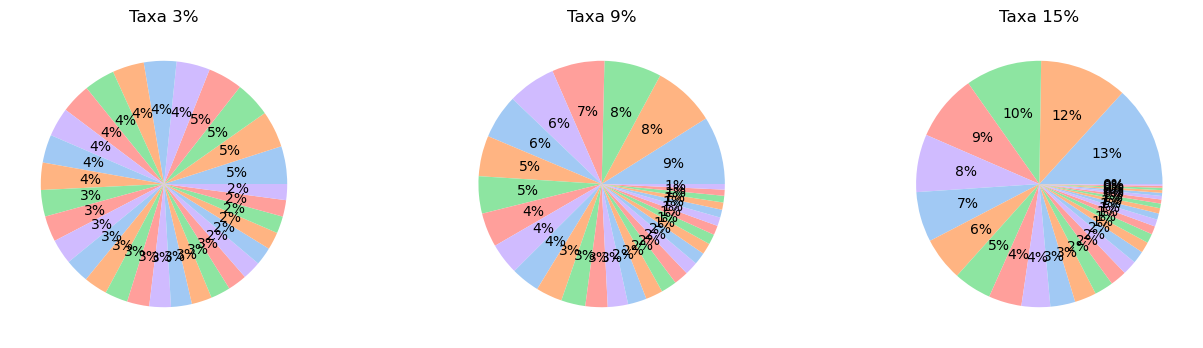

In [2]:
#  (d)
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('seaborn')
colors = sns.color_palette('pastel')[0:5]

y1 = df['Taxa 3%'][1:].to_list()
y2 = df['Taxa 9%'][1:].to_list()
y3 = df['Taxa 15%'][1:].to_list()

y1_sum = sum(y1)
y2_sum = sum(y2)
y3_sum = sum(y3)

width = 0.30
x = np.arange(len(y1))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4), subplot_kw={'aspect':'equal'})
#fig.suptitle('Demostração Grafica');

ax1.pie(y1, colors=colors, autopct='%.0f%%',)
ax2.pie(y2, colors=colors, autopct='%.0f%%')
ax3.pie(y3, colors=colors, autopct='%.0f%%')

ax1.set_title('Taxa 3%')
ax2.set_title('Taxa 9%')
ax3.set_title('Taxa 15%')

plt.show()

In [3]:
#  (e)

y1_prim_fluxos = sum(df['Taxa 3%'][1:4].to_list())
y2_prim_fluxos = sum(df['Taxa 9%'][1:4].to_list())
y3_prim_fluxos = sum(df['Taxa 15%'][1:4].to_list())

print(f'Porcentagem dos primeiros fluxos: \n')
print(f'Desconto 3%: {y1_prim_fluxos/y1_sum:.2%}')
print(f'Desconto 9%: {y2_prim_fluxos/y2_sum:.2%}')
print(f'Desconto 15%: {y3_prim_fluxos/y3_sum:.2%}')

y1_ult_fluxos = sum(df['Taxa 3%'][-3:].to_list())
y2_ult_fluxos = sum(df['Taxa 9%'][-3:].to_list())
y3_ult_fluxos = sum(df['Taxa 15%'][-3:].to_list())
print('----\n')
print(f'Porcentagem dos ultimos fluxos: \n')
print(f'Desconto 3%: {y1_ult_fluxos/y1_sum:.2%}')
print(f'Desconto 9%: {y2_ult_fluxos/y2_sum:.2%}')
print(f'Desconto 15%: {y3_ult_fluxos/y3_sum:.2%}')

Porcentagem dos primeiros fluxos: 

Desconto 3%: 14.43%
Desconto 9%: 24.64%
Desconto 15%: 34.77%
----

Porcentagem dos ultimos fluxos: 

Desconto 3%: 6.50%
Desconto 9%: 2.41%
Desconto 15%: 0.80%


In [4]:
#  Acumulando as taxas
df['Acumulado 3%'] = df['Taxa 3%'].cumsum()
df['Acumulado 9%'] = df['Taxa 9%'].cumsum()
df['Acumulado 15%'] = df['Taxa 15%'].cumsum()

print(tabulate(df[['Anos', 'Acumulado 3%', 'Acumulado 9%', 'Acumulado 15%']], headers='keys', tablefmt='psql', showindex=False))

+--------+----------------+----------------+-----------------+
|   Anos |   Acumulado 3% |   Acumulado 9% |   Acumulado 15% |
|--------+----------------+----------------+-----------------|
|      0 |        -500    |        -500    |         -500    |
|      1 |        -402.91 |        -408.26 |         -413.04 |
|      2 |        -308.65 |        -324.09 |         -337.43 |
|      3 |        -217.14 |        -246.87 |         -271.68 |
|      4 |        -128.29 |        -176.03 |         -214.5  |
|      5 |         -42.03 |        -111.04 |         -164.78 |
|      6 |          41.72 |         -51.41 |         -121.55 |
|      7 |         123.03 |           3.29 |          -83.96 |
|      8 |         201.97 |          53.48 |          -51.27 |
|      9 |         278.61 |          99.52 |          -22.84 |
|     10 |         353.02 |         141.76 |            1.88 |
|     11 |         425.26 |         180.51 |           23.37 |
|     12 |         495.4  |         216.06 |           

In [5]:
#  (f)
import math

payback1 = 5 + ((df.at[5, 'Acumulado 3%']*-1)/df.at[6, 'Taxa 3%'])
payback1 = math.ceil(payback1 * 100) / 100.0
print(f'Payback do Fluxo a 3%: {payback1} Anos')


payback2 = 6 + ((df.at[6, 'Acumulado 9%']*-1)/df.at[7, 'Taxa 9%'])
payback2 = math.ceil(payback2 * 100) / 100.0
print(f'Payback do Fluxo a 9%: {payback2} Anos')


payback3 = 9 + ((df.at[9, 'Acumulado 15%']*-1)/df.at[10, 'Taxa 15%'])
payback3 = math.ceil(payback3 * 100) / 100.0
print(f'Payback do Fluxo a 15%: {payback3} Anos')

Payback do Fluxo a 3%: 5.51 Anos
Payback do Fluxo a 9%: 6.94 Anos
Payback do Fluxo a 15%: 9.93 Anos


In [6]:
#  (g)
import numpy_financial as npf

tir = round(npf.irr(df['FCn'].values), 4)
print(f'TIR do Fluxo: {tir:.2%}')
print(f'TIR MAIOR que a Taxa Minima de atratividade: Aceito\n')

TIR do Fluxo: 19.91%
TIR MAIOR que a Taxa Minima de atratividade: Aceito



In [7]:
# (h)

import numpy as np
import pandas as pd
from tabulate import tabulate

anos = np.arange(0,31+2)
fc = np.append([-500.0, 0, 0], np.repeat(100.0, 30))

df = pd.DataFrame({'Anos': anos, 'FCn': fc})

df['Taxa 3%'] = df['FCn'].values / (1+(3/100))**df['Anos'].values
df['Acumulado 3%'] = df['Taxa 3%'].cumsum()

df['Taxa 9%'] = df['FCn'].values / (1+(9/100))**df['Anos'].values
df['Acumulado 9%'] = df['Taxa 9%'].cumsum()

df['Taxa 15%'] = df['FCn'].values / (1+(15/100))**df['Anos'].values
df['Acumulado 15%'] = df['Taxa 15%'].cumsum()

df = df.round(2)

print(tabulate(df[['Anos', 'Acumulado 3%', 'Acumulado 9%', 'Acumulado 15%']], headers='keys', tablefmt='psql', showindex=False))

+--------+----------------+----------------+-----------------+
|   Anos |   Acumulado 3% |   Acumulado 9% |   Acumulado 15% |
|--------+----------------+----------------+-----------------|
|      0 |        -500    |        -500    |         -500    |
|      1 |        -500    |        -500    |         -500    |
|      2 |        -500    |        -500    |         -500    |
|      3 |        -408.49 |        -422.78 |         -434.25 |
|      4 |        -319.64 |        -351.94 |         -377.07 |
|      5 |        -233.38 |        -286.95 |         -327.36 |
|      6 |        -149.63 |        -227.32 |         -284.12 |
|      7 |         -68.32 |        -172.62 |         -246.53 |
|      8 |          10.62 |        -122.43 |         -213.84 |
|      9 |          87.26 |         -76.39 |         -185.41 |
|     10 |         161.67 |         -34.15 |         -160.69 |
|     11 |         233.92 |           4.61 |         -139.2  |
|     12 |         304.05 |          40.16 |         -1

In [8]:
import numpy_financial as npf

tir1 = round(npf.irr(df['FCn'].values), 4)
print(f'TIR do Novo Fluxo: {tir1:.2%}')
print(f'TIR MAIOR que a Taxa Mínima de atratividade: Aceito\n')

TIR do Novo Fluxo: 14.91%
TIR MAIOR que a Taxa Mínima de atratividade: Aceito



Conclusão:

Quanto maior a taxa de desconto, mais impactante é o atraso do pagamento.
Nessa tabela podemos ver que o payback do fluxo descontado a 15% nunca acontecerá, e o projeto levará a um prejuízo. Também calculei a TIR dos projetos, e vemos que com o novo fluxo só o primeiro deverá ser aceito.

---

### Questões para Revisão

1 - O que é um mercado competitivo? Descreva brevemente os tipos de mercados que não são perfeitamente competitivos.

4 - Uma mudança dos gostos dos consumidores leva a um movimento ao longo da curva de demanda ou a um deslocamento desta? Uma mudança no preço leva a um movimento ao longo da curva de demanda ou a um deslocamento desta?

#### Resolução

1 -
Um mercado competitivo é composto de vendedores e compradores. A quantidade e capilaridade desses indivíduos é tão grande e diversa que as ações individuais dos participantes não afetam o preço final do produto. Sendo assim, os preços não são determinador por um único player.
Os mercados não competitivos são os Monopólios, Oligopólios e o  Monopolisticamente competitivo. 

4 - 
Uma mudança dos gostos leva a um deslocamento da curva de demanda.
Uma mudança no preço leva a um movimento ao longo da curva.

### Problemas e Aplicações

1 - 
Explique cada uma das declarações abaixo usando diagramas de oferta e demanda. 

16 - 
Considere o mercado de minivans. Para cada evento listado a seguir, identifique que determinantes da oferta ou da demanda são afetados. In- dique também se a demanda ou a oferta aumenta ou diminui. Faça um diagrama para demonstrar o efeito no preço e na quantidade comercializada de minivans.

#### Resolução

1 - 
a. "Quando uma frente fria atinge a Flórida, o preço do suco de laranja aumenta nos supermercados de todo o território norte americano". Esse tipo de evento gera uma redução na quantidade de insumos. O Excesso de demanda possibilita que os vendedores elevem o nivel de preço.

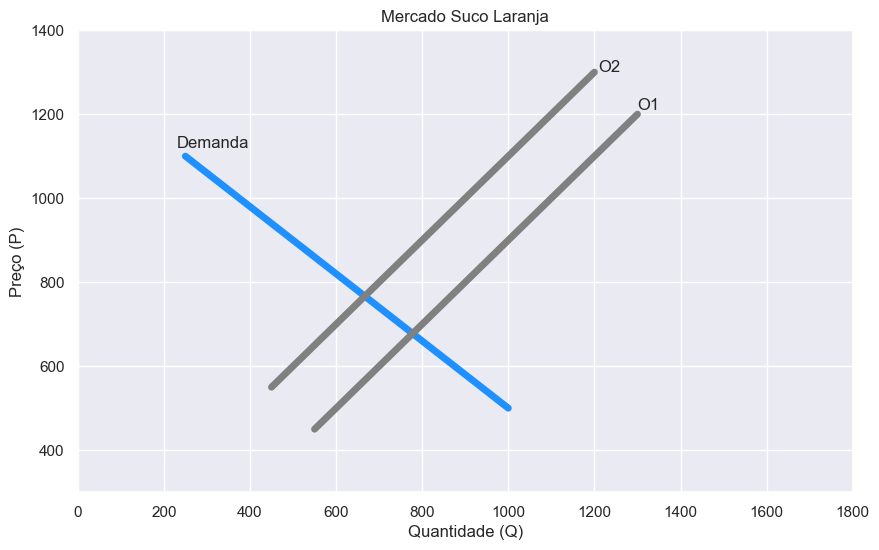

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

demand1 = np.arange(1000, 200, -125) # Eixo X
price1 = np.arange(500, 1200, 100) # Eixo Y

#demand2 = np.arange(1600, 800, -125)
#price2 = np.arange(400, 1100, 100)

supply = np.arange(1300, 500, -50) # Eixo X
price_supply = np.arange(1200, 400, -50) # Eixo Y

supply2 = np.arange(1200, 400, -50) # Eixo X
price_supply2 = np.arange(1300, 500, -50) # Eixo Y

plt.figure(figsize=(10,6))

# Plotando as curvas.
plt.plot(demand1, price1, 'dodgerblue', supply, price_supply, 'grey', supply2, price_supply2, 'grey', linewidth=5.0)

# Delimitando.
plt.axis((0, 1800, 300, 1400))

# labels
plt.xlabel('Quantidade (Q)')
plt.ylabel('Preço (P)')

# Anotações
plt.annotate('Demanda', xy=(230, 1120))
plt.annotate('O1', xy=(1300, 1210))
plt.annotate('O2', xy=(1210, 1300))

plt.title('Mercado Suco Laranja')

plt.show()

1 - 
b. "A cada verão quando começa a esquentar na Nova Inglaterra, o preço das diárias nos hotéis no Caribe despencam". A nova Inglaterra acaba aparecendo como uma opção viável para os consumidores como viagens de verão.

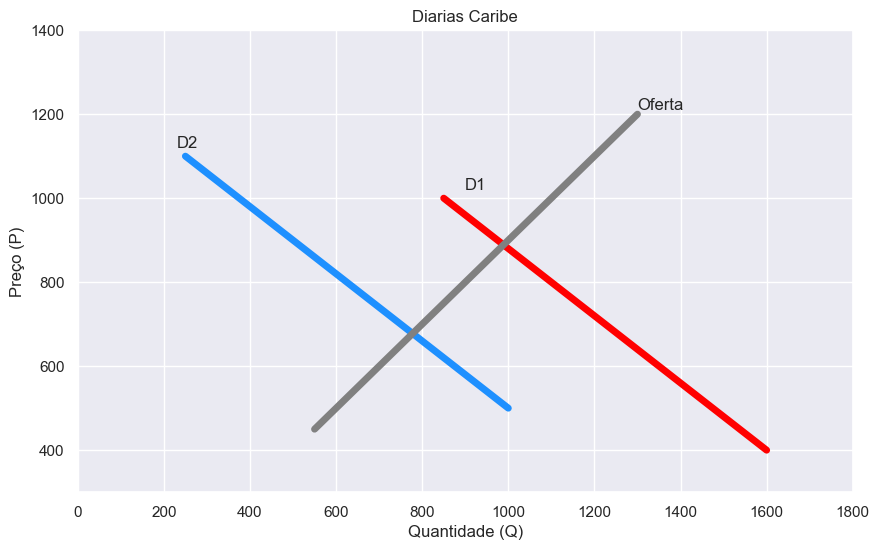

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

demand1 = np.arange(1000, 200, -125) # Eixo X
price1 = np.arange(500, 1200, 100) # Eixo Y

demand2 = np.arange(1600, 800, -125)
price2 = np.arange(400, 1100, 100)

supply = np.arange(1300, 500, -50) # Eixo X
price_supply = np.arange(1200, 400, -50) # Eixo Y

#supply2 = np.arange(1200, 400, -50) # Eixo X
#price_supply2 = np.arange(1300, 500, -50) # Eixo Y

plt.figure(figsize=(10,6))

# Plotando as curvas.
plt.plot(demand1, price1, 'dodgerblue', demand2, price2, 'red',supply, price_supply, 'grey', linewidth=5.0)

# Delimitando.
plt.axis((0, 1800, 300, 1400))

# labels
plt.xlabel('Quantidade (Q)')
plt.ylabel('Preço (P)')

# Anotações
plt.annotate('D2', xy=(230, 1120))
plt.annotate('D1', xy=(900, 1020))

plt.annotate('Oferta', xy=(1300, 1210))
#plt.annotate('O2', xy=(1210, 1300))

plt.title('Diarias Caribe')

plt.show()

1 - 
b. "Quando irrompe uma guerra no Oriente Médio o preço da gasolina aumenta e o perço do Cadillac usado diminui". Gera uma retração da oferta. Esse deslocamento cria um excesso de demanda e os vendedores elevam o nível dos preços da commodity. Os carros e outros meios que utilizam gasolina, ficam menos interessantes aos consumidores. 

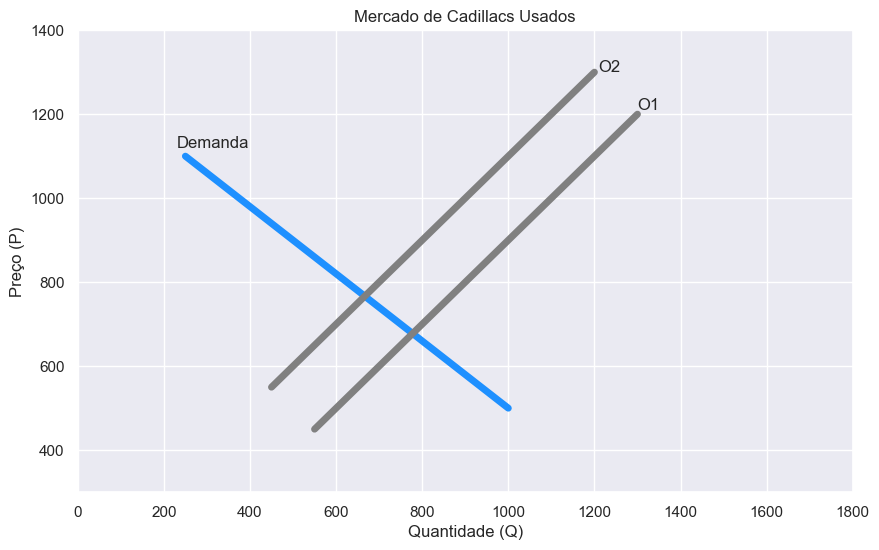

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

demand1 = np.arange(1000, 200, -125) # Eixo X
price1 = np.arange(500, 1200, 100) # Eixo Y

#demand2 = np.arange(1600, 800, -125)
#price2 = np.arange(400, 1100, 100)

supply = np.arange(1300, 500, -50) # Eixo X
price_supply = np.arange(1200, 400, -50) # Eixo Y

supply2 = np.arange(1200, 400, -50) # Eixo X
price_supply2 = np.arange(1300, 500, -50) # Eixo Y

plt.figure(figsize=(10,6))

# Plotando as curvas.
plt.plot(demand1, price1, 'dodgerblue', supply, price_supply, 'grey', supply2, price_supply2, 'grey', linewidth=5.0)

# Delimitando.
plt.axis((0, 1800, 300, 1400))

# labels
plt.xlabel('Quantidade (Q)')
plt.ylabel('Preço (P)')

# Anotações
plt.annotate('Demanda', xy=(230, 1120))
plt.annotate('O1', xy=(1300, 1210))
plt.annotate('O2', xy=(1210, 1300))

plt.title('Mercado de Cadillacs Usados')

plt.show()

3 - 

a. As pessoas decidem ter mais filhos: Essa mudança de gostos gera uma demanda maior por Minivans, consequentemente um aumento nos preços.

b. Uma greve de metalúrgicos aumenta o preço do aço: O aumento do preço de um dos insumos gera uma quantidade menor de minivans no mercado e maiores preços.

c. Os engenheiros desenvolvem novos equipamento automatizados para a produção de minivans:
O desenvolvimento de uma nova tecnologia com produtividade maior aumenta a quantidade de minivans no mercado, gerando uma redução de preços.

d. Há um aumento no preço dos utilitários esportivos: O aumento do preço de um produto substituto gera uma demanda maior pelas Minivans e um aumento de preços pela demanda.

e. Uma quebra na bolsa de valores diminui a riqueza das pessoas: A redução de renda das pessoas diminui a oferta e também a quantidade de produtos disponíveis, elevando o nível de preços. 

---